# Goulib
my library of useful code for scientific + technical applications

- author: Philippe Guglielmetti goulib@goulu.net
- copyright: Copyright 2013 Philippe Guglielmetti
- license: LGPL (see LICENSE.TXT)

- installation : "pip install Goulib"
- distribution: https://pypi.python.org/pypi/Goulib
- documentation: https://goulib.readthedocs.org/
- source : https://github.com/goulu/Goulib

Some modules offer specific IPython Notebook support


In [1]:
from Goulib.htmlnotes import h1,h2,h3,h
h1('this is a title')
h2('this is a sub-title')
h3('this is a sub sub title')
h('there is no problem to include also',1+1,'or more parameters')

In [3]:
from Goulib import math2, itertools2 #Goulib modules that complement std modules

## Math2

In [4]:
list(math2.factorize(1548))

[(2, 2), (3, 2), (43, 1)]

## Colors

In [5]:
from Goulib.colors import *

In [6]:
c=color['blue'] # color is a dict of most used colors indexed by name
h(c, color_lookup[c]) # reversed dict to retrieve color name by hex string

In [7]:
red=Color('red') #Color objects can be init'ed by name,
green=Color('#00ff00') # by RGB hex string,
blue=Color((0,0,1)) #or by RGB triplet
blue # Color objects have an HTML representation

Color('blue')

In [9]:
#colors can be added
cyan=blue+green
magenta=blue+red
yellow=red+green

h(magenta.name, magenta.hex, magenta.rgb) # see ? the color name of the sum is correct too !
magenta

Color('fuchsia')

In [10]:
magenta-cyan-yellow #and colors can be substracted too

Color('black')

In [11]:
c= Color('gray')-red # colors can be substracted too. RGB values might go off bounds, but hex is bounded
h(c.name, c.hex, c.rgb) # see ? the color name of the sum is correct too !
c

Color('teal')

In [13]:
from random import random
Color((random(),random(),random())) # unknown colors recieve name of the nearest known color with a tile before
# re-run this cell to see changes

Color('#43bf1e')

In [14]:
from IPython.display import display
def html(iterable):
    for _ in iterable:
        display(_)
html(map(Color,color_range(5,'red','blue')))

Color('red')

Color('yellow')

Color('lime')

Color('cyan')

Color('blue')

## Table
Table class with Excel + CSV I/O, easy access to columns, HTML output, and much more.

In [15]:
from Goulib.table import *
Table(titles=['A','B'],data=[['first',2],[3,'last']]) # a very simple table

A,B
first,2
3,last


In [16]:
t=Table('tests/test.xls') # read Excel files thanks to xlrd (http://www.python-excel.org/)

In [18]:
h(t.titles) #column headers can be used as indexes
h()
h(t[:3]) # since a Table is a list of rows, rows can be accessed by indexing. 
h()
h(t.rowasdict(1)) #a row can be extracted as a dict where column titles are keys

In [19]:
# handle the mess in Excel Cell types ...
t.to_date('OrderDate',fmt=['%m/%d/%Y','Excel']) #converts column to date using several possible formats...
t.applyf('Cost',float) # apply a function to a column. Here force the column to contain floats
t.applyf('Total',lambda x:float(x) if isinstance(x,(int,float)) else float(x.replace(',','')))

True

In [20]:
from Goulib.stats import mean
t[10:]=[] #keep only the 10 first lines to save space below
t.sort('Total',reverse=True) # Tables can be sorted like lists
t.total([max,itertools2.count_unique,itertools2.count_unique,itertools2.count_unique,sum,mean,sum])
t.footer #contains the result of the last call to total 

[datetime.date(2012, 9, 2), 3, 7, 3, 581, 7.289999999999999, 3576.19]

In [21]:
t # HTML representation in Notebook. Note the title/header and total/footer rows and cell alignment

OrderDate,Région,Rep,Item,Unités,Cost,Total
2012-01-23,Central,Kivell,Binder,50,19.99,999.50
2012-02-26,Central,Gill,Pen,27,19.99,539.73
2012-08-06,East,Jones,Binder,60,8.99,539.40
2012-05-05,Central,Jardine,Pencil,90,4.99,449.10
2012-01-04,East,Jones,Binder,60,4.99,299.40
2012-06-01,East,Jones,Pencil,95,1.99,189.05
2012-09-02,Central,Jardine,Pencil,36,4.99,179.64
2012-03-15,West,Sorvino,Pencil,56,2.99,167.44
2012-04-18,Central,Andrews,Pencil,75,1.99,149.25
2012-05-22,West,Thompson,Pencil,32,1.99,63.68


In [22]:
region=t.groupby(u'Région') # dictionary of subtables grouped by a column. notice Unicode support
region['East'] # isn't it nice ?

OrderDate,Rep,Item,Unités,Cost,Total
2012-08-06,Jones,Binder,60,8.99,539.40
2012-01-04,Jones,Binder,60,4.99,299.40
2012-06-01,Jones,Pencil,95,1.99,189.05


## Stats

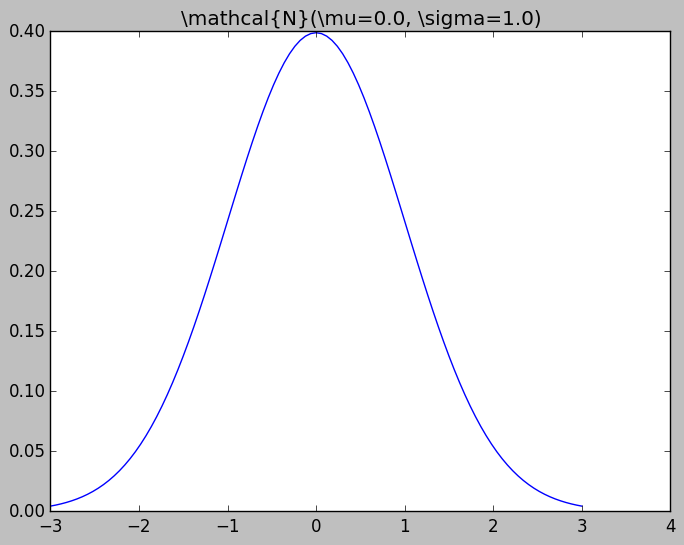

In [23]:
from Goulib.stats import *

Normal().png()

## Geom
Vector, matrix and quaternion operations + line, arc, circle entities for use in 2D and 3D graphics applications.


In [26]:
from Goulib.geom import *
import sys,inspect
h('geom defines many classes : %s'%dict(inspect.getmembers(sys.modules['Goulib.geom'], inspect.isclass)).keys())

In [27]:
Arc2((0,0),(0,1),(1,0)) #does not render in IPython

Arc2(center=Point2(0, 0),p1=Point2(0, 1),p2=Point2(1, 0),r=1.0)

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: Arc2(center=Point2(0, 0),p1=Point2(0, 1),p2=Point2(1, 0),r=1.0)
  FormatterWarning


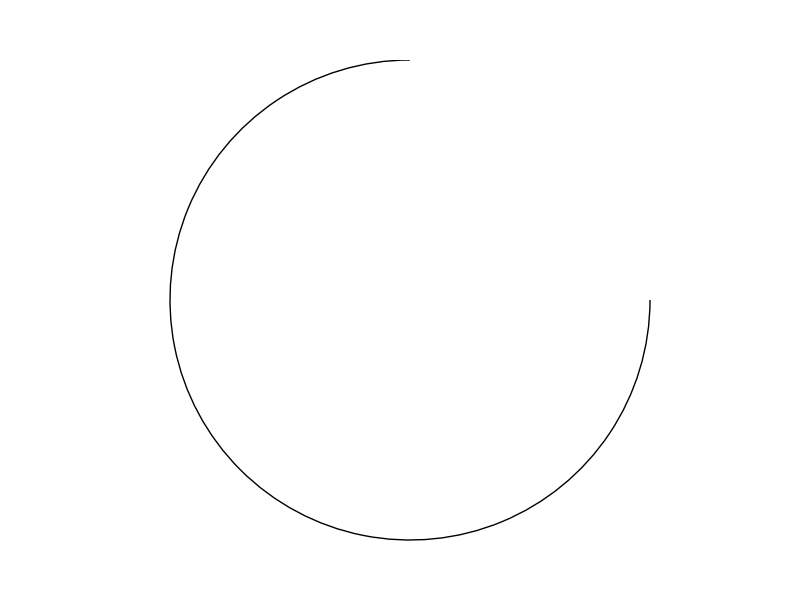

In [28]:
from Goulib.drawing import * #adds rendering (and more) to Geom
a=Arc2((0,0),(0,1),(1,0)) #same class is now rendered in IPython
a

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [[Segment2(Point2(-2, 0.5),Point2(2, 0.5)), Segment2(Point2(-2, -0.5),Point2(2, -0.5))], Arc2(center=Point2(0, 0),p1=Point2(0, 1),p2=Point2(1, 0),r=1.0)]
  FormatterWarning


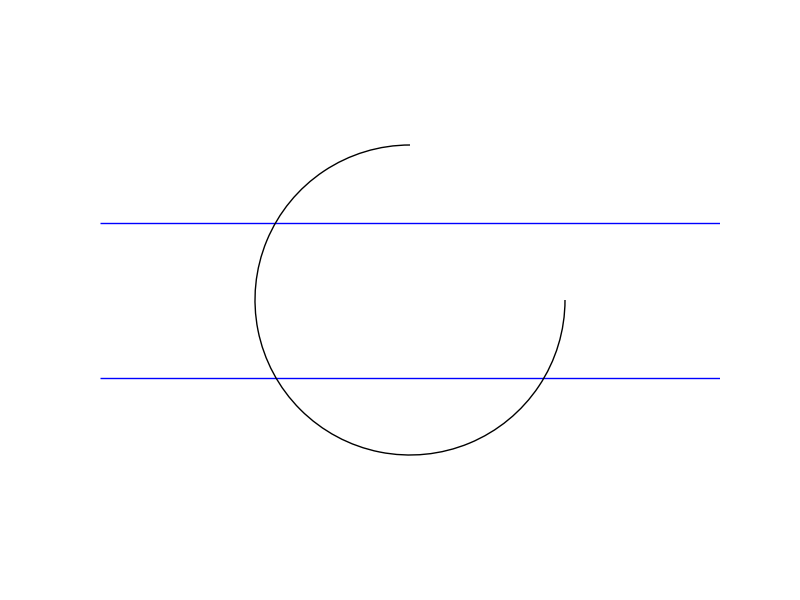

In [29]:
l1=Segment2((-2,.5),Vector2(4,0)) #horizontal at y=0.5
l2=Segment2((-2,-.5),Vector2(4,0)) #horizontal at y=-0.5
lines=Group([l1,l2])
lines.color='blue'
Group([lines,a])

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [[Segment2(Point2(-2, 0.5),Point2(2, 0.5)), Segment2(Point2(-2, -0.5),Point2(2, -0.5))], Arc2(center=Point2(0, 0),p1=Point2(0, 1),p2=Point2(1, 0),r=1.0), [Point2(-0.8660254037844386, 0.5), Point2(0.8660254037844384, -0.5), Point2(-0.8660254037844386, -0.5)]]
  FormatterWarning


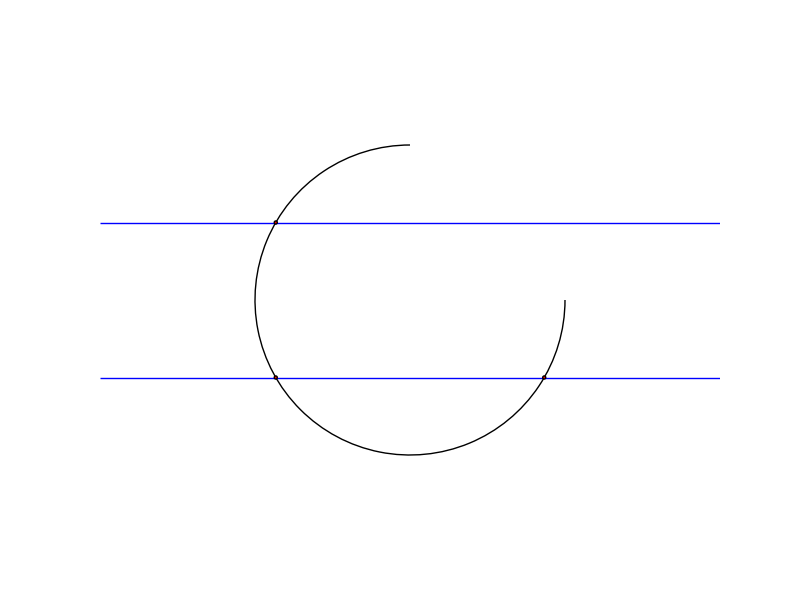

In [30]:
pts=Group([i[0] for i in lines.intersect(a)]) # list of intersection points
Group([lines,a,pts])

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [[Point2(-0.8660254037844386, 0.5), Point2(0.8660254037844384, -0.5), Point2(-0.8660254037844386, -0.5)], Circle(Point2(-9.614813431917822e-17, -0.0),1), Arc2(center=Point2(-9.614813431917822e-17, -0.0),p1=Point2(-0.8660254037844386, 0.5),p2=Point2(-0.8660254037844386, -0.5),r=0.9899999999999998)]
  FormatterWarning


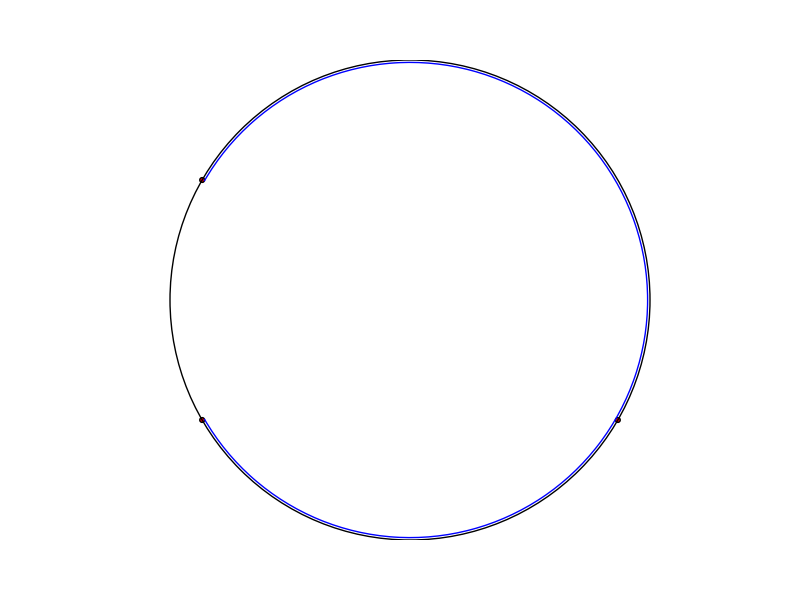

In [31]:
c1=circle_from_3_points(*pts) # classic
a1=arc_from_3_points(*pts) # not trivial ;-)
a1.r*=.99
a1.color='blue'
Group([pts,c1,a1])

## Drawing
vector graphics in .dxf, .svg and .pdf formats based on Geom

In [33]:
from Goulib.drawing import *
import inspect
h('drawing adds more classes to geom : %s'%dict(inspect.getmembers(sys.modules['Goulib.drawing'], inspect.isclass)).keys())

Geom entities and others defined in Drawing can be grouped :

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [Rect(Point2(-1, 0),Point2(0, 1)), Rect(Point2(1, -1),Point2(2, 2)), Circle(Point2(4, 4),1), Circle(Point2(0, 2),0.5), Segment2(Point2(0.0, 0.0),Point2(1.0, 0.0)), Segment2(Point2(2.0, 2.0),Point2(3.2928932188134525, 3.2928932188134525)), Segment2(Point2(3.1055728090000843, 3.552786404500042),Point2(0.44721359549995787, 2.223606797749979))]
  FormatterWarning


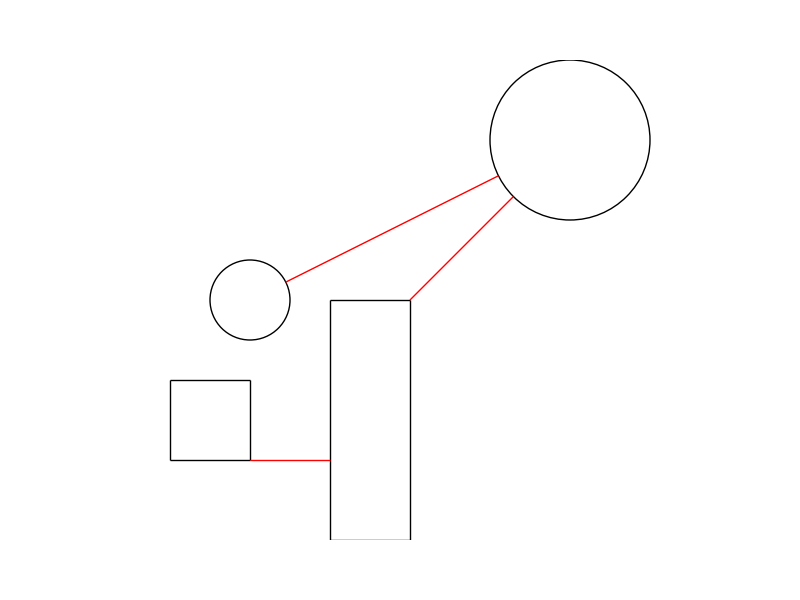

In [34]:
r1=Rect((0,0),(-1,1))
r2=Rect((1,-1),(2,2))
c1=Circle(Point2(4,4),1)
c2=Circle(Point2(0,2),.5)
s1=r1.connect(r2)
s1.color='red'
s2=r2.connect(c1)
s2.color='red'
s3=c1.connect(c2)
s3.color='red'

g=Group([r1,r2,c1,c2,s1,s2,s3])
g

Groups can be handled as entities :

C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [[Rect(Point2(-1, 0),Point2(0, 1)), Rect(Point2(1, -1),Point2(2, 2)), Circle(Point2(4, 4),1), Circle(Point2(0, 2),0.5), Segment2(Point2(0.0, 0.0),Point2(1.0, 0.0)), Segment2(Point2(2.0, 2.0),Point2(3.2928932188134525, 3.2928932188134525)), Segment2(Point2(3.1055728090000843, 3.552786404500042),Point2(0.44721359549995787, 2.223606797749979))], [Rect(Point2(8.267949192431123, 1.1102230246251565e-16),Point2(9.0, 2.7320508075688776)), Rect(Point2(12.732050807568877, 0.2679491924311225),Point2(11.464101615137755, 6.464101615137754)), Circle(Point2(12.92820323027551, 11.928203230275509),2), Circle(Point2(8.0, 4.464101615137755),1), Segment2(Point2(10.0, 1.0),Point2(11.732050807568877, 2.0)), Segment2(Point2(11.464101615137755, 6.464101615137754),Point2(12.410565140070469, 9.996351577697371)), Segment2

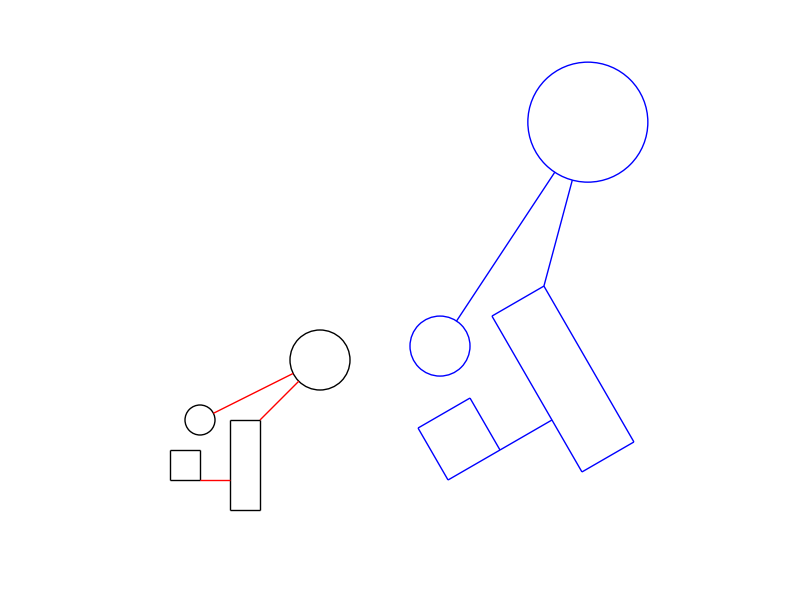

In [35]:
g2=Trans(scale=2, offset=(10,1), rotation=30)*g
g2.color='blue'
h(g.distance(g2))
Group([g,g2]) #group of groups

Drawing objects can be read/saved from/to various formats including pdf, svg and dxf 

In [36]:
Drawing('tests/drawing.pdf')

ImportError: No module named 'pdfminer'

In [37]:
Drawing('tests/drawing.svg')

ImportError: No module named 'svg'

In [38]:
Drawing('tests/drawing.dxf')

ImportError: No module named 'dxfgrabber'

Drawing also extends geom to allow geometric constructions


C:\Users\Marc\Anaconda3\lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: image/svg+xml formatter returned invalid type <class 'bytes'> (expected (<class 'str'>,)) for object: [Circle(Point2(0.0, 0.0),1), Circle(Point2(0.1, 0.09983341664682815),1), Circle(Point2(0.2, 0.19866933079506122),1), Circle(Point2(0.30000000000000004, 0.2955202066613396),1), Circle(Point2(0.4, 0.3894183423086505),1), Circle(Point2(0.5, 0.479425538604203),1), Circle(Point2(0.6000000000000001, 0.5646424733950355),1), Circle(Point2(0.7000000000000001, 0.6442176872376911),1), Circle(Point2(0.8, 0.7173560908995228),1), Circle(Point2(0.9, 0.7833269096274834),1), Circle(Point2(1.0, 0.8414709848078965),1), Circle(Point2(1.1, 0.8912073600614354),1), Circle(Point2(1.2000000000000002, 0.9320390859672264),1), Circle(Point2(1.3, 0.963558185417193),1), Circle(Point2(1.4000000000000001, 0.9854497299884603),1), Circle(Point2(1.5, 0.9974949866040544),1), Circle(Point2(1.6, 0.9995736030415051),1), Circle(Point2

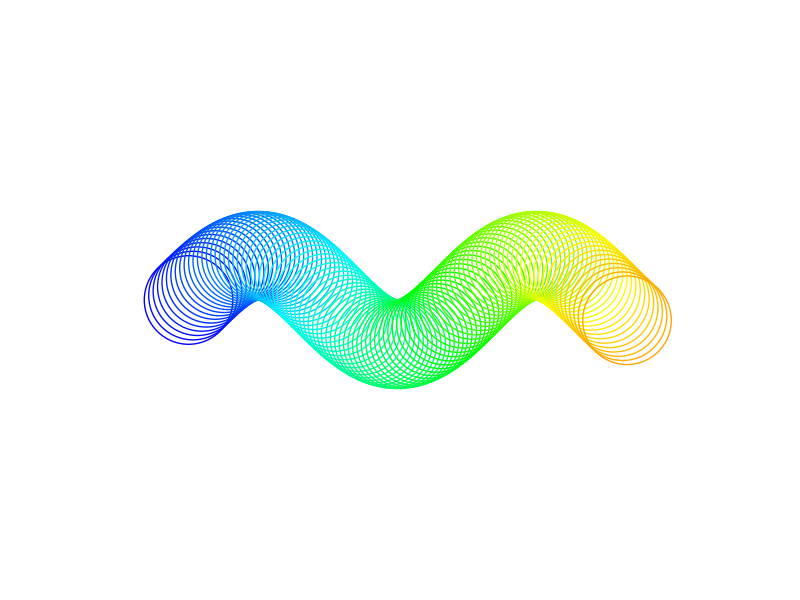

In [39]:
d=Drawing()
for i,color in enumerate(color_range(100,'blue','orange')):
    circle=Circle((i*.1,sin(.1*i)),1)
    circle.color=color
    d.append(circle)
d

## Graph
efficient Euclidian Graphs for [NetworkX](http://networkx.github.io/) and related algorithms

In [40]:
import networkx as nx
from Goulib.graph import *

In [41]:
g=nx.gn_graph(20)
nx.draw_networkx(g)

In [42]:
draw_networkx(g) #improved version over nx.draw_networkx

In [43]:
geo=nx.geographical_threshold_graph(50,25)
geo # NetworkX Graphs do not render in Notebooks...

ValueError: I/O operation on closed file.

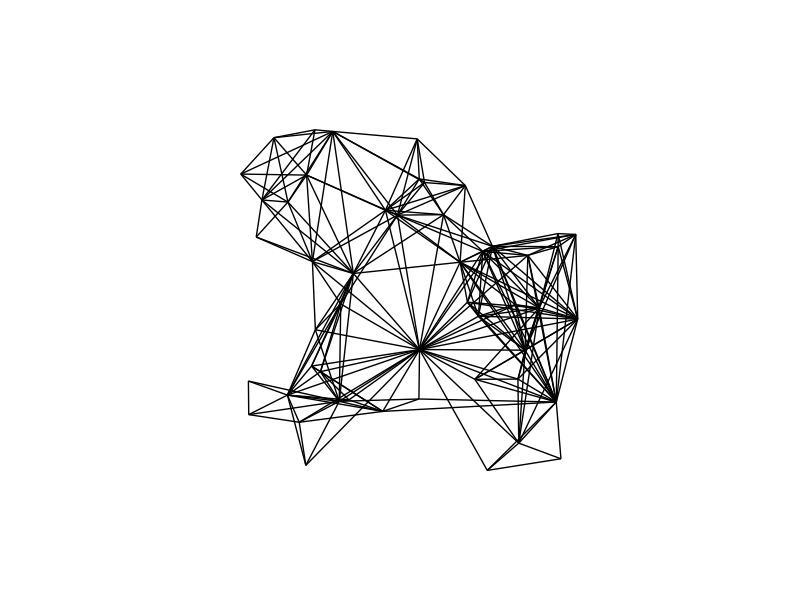

In [44]:
geo=GeoGraph(geo)
geo # GeoGraphs do !

In [45]:
# it's easy to make GeoGraphs look nice
def edge_color(data): # simply define a function that maps edge data to a color
    return plt.get_cmap('Blues')(data['length']/.25)       
geo.render(edge_color=edge_color, node_size=50) #this will set geo.render_args ...
geo #... so here we display them :-)

ValueError: I/O operation on closed file.

In [ ]:
d=to_drawing(geo) # graphs can also be converted or added to a Goulib.Drawing
c=Circle((0.5,0.5),0.5)
c.color='red'
d.append(c)

In [ ]:
nodes=points_on_sphere(12)
sphere=GeoGraph(nodes=nodes) #GeoGraphs can also be built from n-dim points only
sphere.render(edge_color=edge_color, node_size=50) #this will set geo.render_args ...
sphere

In [ ]:
delauney_triangulation(geo) #creates a new GeoGraph from Delauney triangulation of a GeoGraph's nodes

## Expr

In [47]:
from Goulib.expr import *
from math import sin

e1=Expr(lambda x:3*x+2,name='3x+2') #a very simple expression
h(e1(1))

In [48]:
e2=Expr(sin)
h(e2,e1)

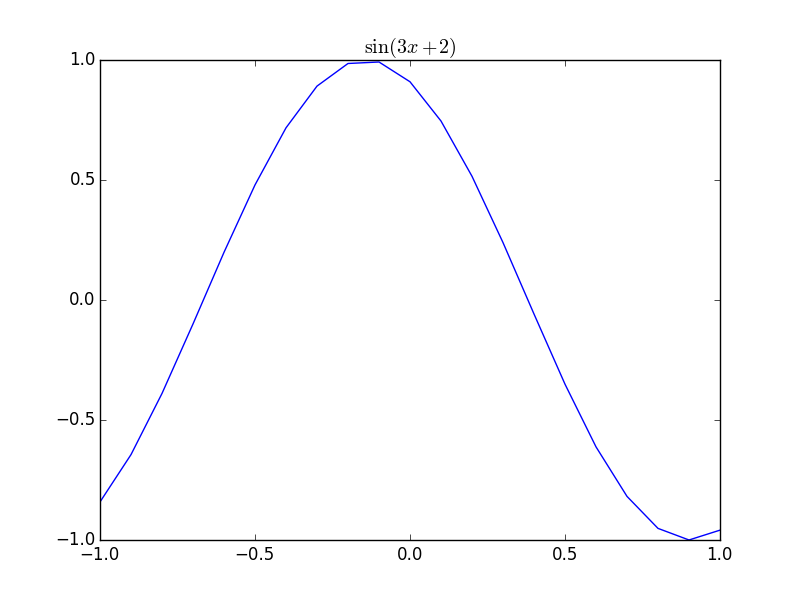

In [49]:
e2(e1) #Expr can be composed and are rendered as LaTeX by default

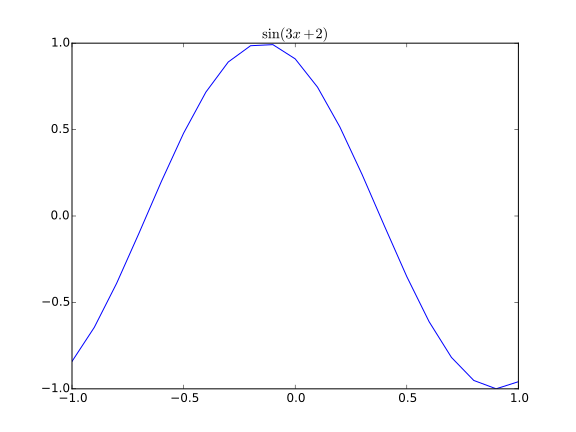

In [50]:
e2(e1).plot()  # Expr can be also plotted

## Polynomial

a Polynomial is an Expr defined by factors and with some more methods

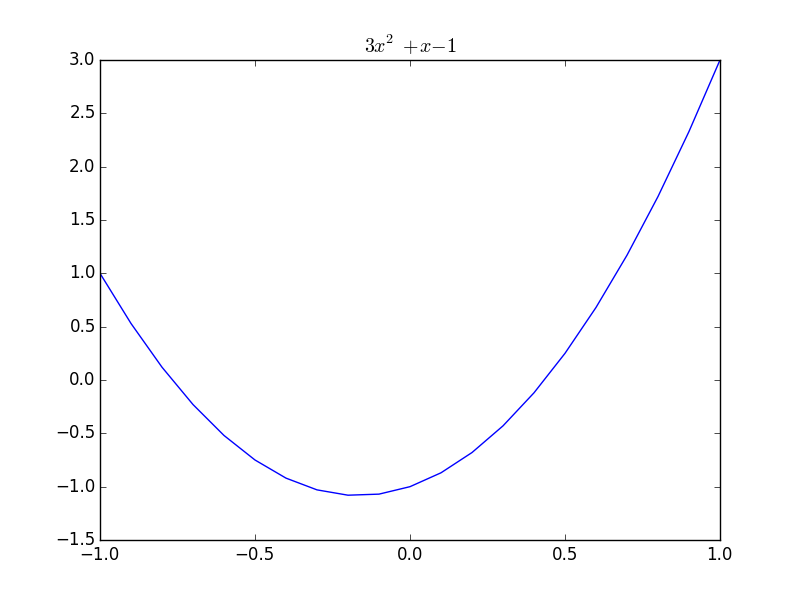

In [51]:
from Goulib.polynomial import *

p1=Polynomial([-1,1,3]) # inited from coefficients in ascending power order
p1 # Latex output

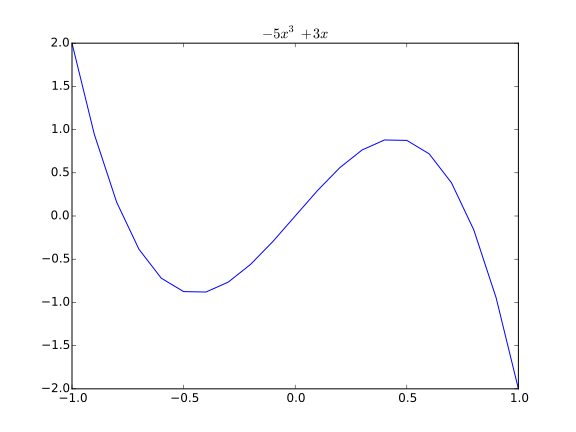

In [52]:
p2=Polynomial('- 5x^3 +3*x') # inited from string, in any power order, with optional spaces and *
p2.plot()

In [53]:
[p1(x) for x in itertools2.arange(-1,1,.2)] #evaluation

[1,
 0.12000000000000033,
 -0.5199999999999998,
 -0.9199999999999999,
 -1.08,
 -1.0,
 -0.6800000000000002,
 -0.12000000000000016,
 0.68,
 1.7200000000000004]

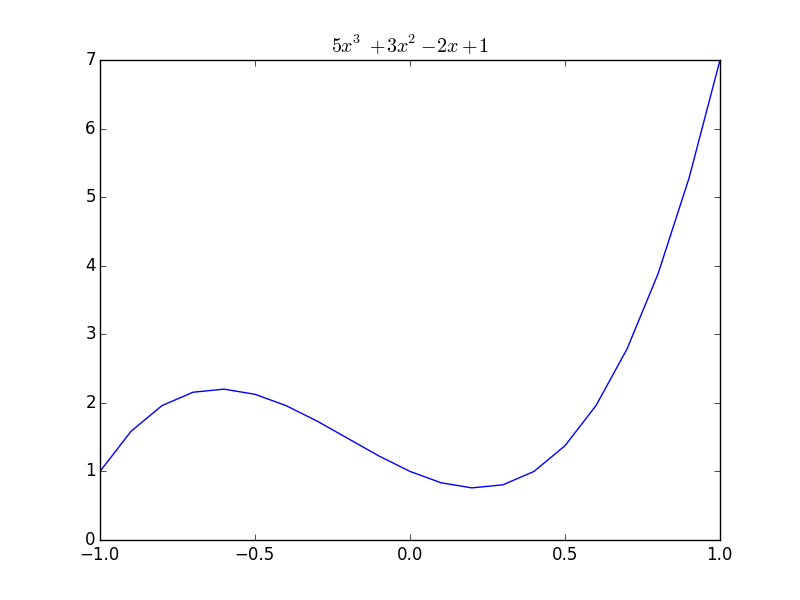

In [54]:
p1-p2+2 # addition and subtraction of polynomials and scalars

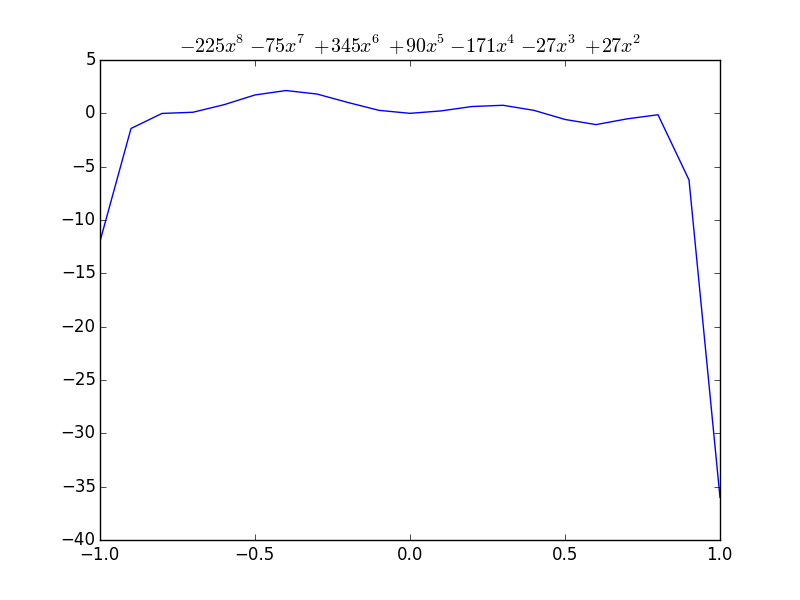

In [55]:
-3*p1*p2**2 # polynomial (and scalar) multiplication and scalar power

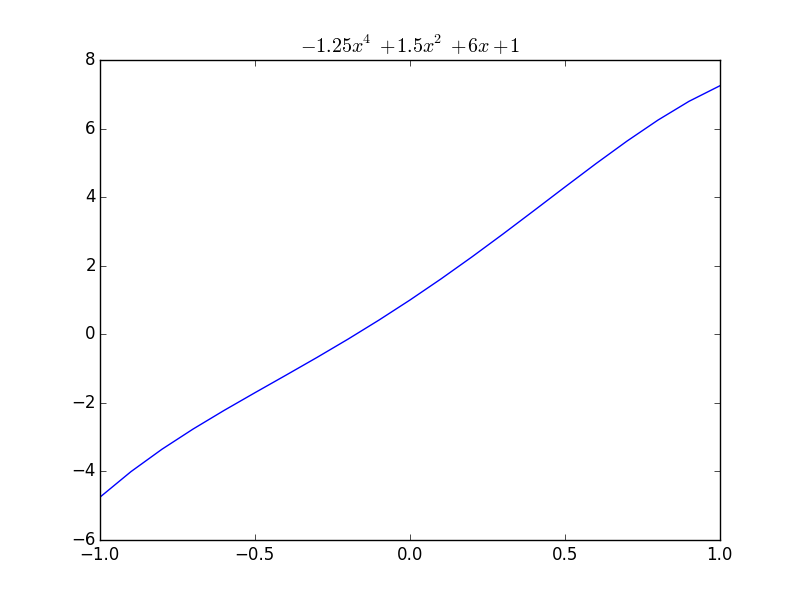

In [56]:
p1.derivative()+p2.integral() #integral and derivative

## Motion
"motion laws" are functions of time which return (position, velocity, acceleration, jerk) tuples

In [57]:
from Goulib.motion import *

### Polynomial Segments

Polynomials are very handy to define Segments as coefficients can easily be determined from start/end conditions.
Also, polynomials can easily be integrated or derivated in order to obtain position, velocity, or acceleration laws from each other.

Motion defines several handy functions that return SegmentPoly matching common situations

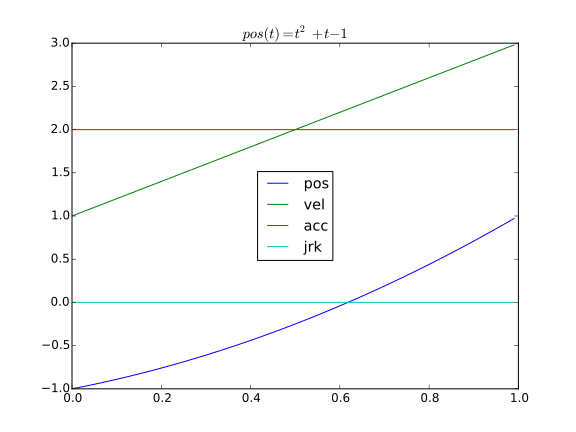

In [58]:
seg=Segment2ndDegree(0,1,(-1,1,2)) # time interval and initial position,velocity and constant acceleration
seg.plot()

In [60]:
seg=Segment4thDegree(0,None,(-2,1),(2,3)) #start time and initial and final (position,velocity)
seg.plot()

TypeError: unorderable types: NoneType() <= int()

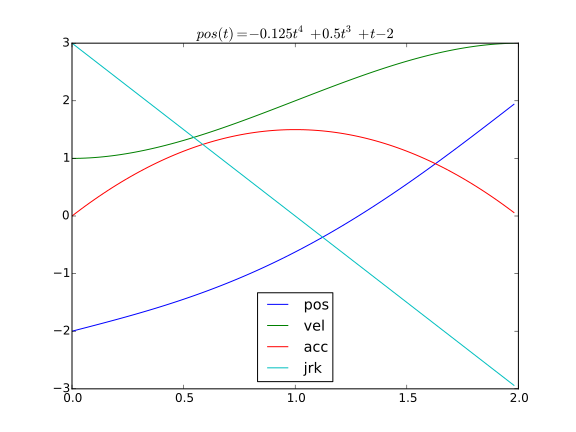

In [61]:
seg=Segment4thDegree(0,2,(-2,1),(None,3)) # start and final time, initial (pos,vel) and final vel
seg.plot()

## Interval
operations on [a..b[ intervals

In [62]:
from Goulib.interval import *

Interval(5,6)+Interval(2,3)+Interval(3,4)

[[2,4), [5,6)]

## Piecewise
Piecewise defined functions

In [63]:
from Goulib.piecewise import *

The simplest are piecewise continuous functions. They are defined by $(x_i,y_i)$ tuples given in any order. 

$f(x) = \begin{cases}y_0 & x < x_1 \\ y_i & x_i \le x < x_{i+1} \\ y_n & x > x_n \end{cases}$

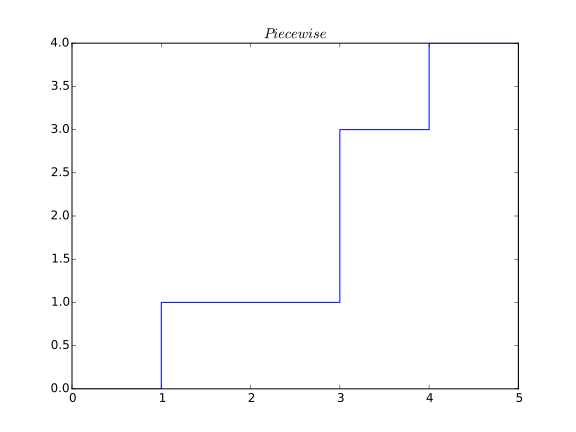

In [64]:
p1=Piecewise([(4,4),(3,3),(1,1),(5,0)])
p1.plot()

By default y0=0 , but it can be specified at construction.

Piecewise functions can also be defined by adding (x0,y,x1) segments

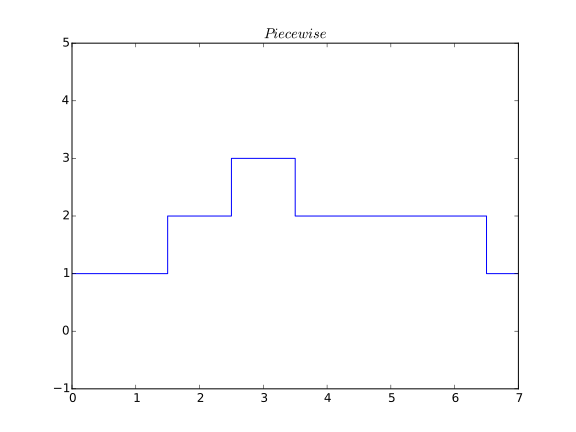

In [65]:
p2=Piecewise(default=1)
p2+=(2.5,1,6.5)
p2+=(1.5,1,3.5)
p2.plot(xmax=7,ylim=(-1,5))

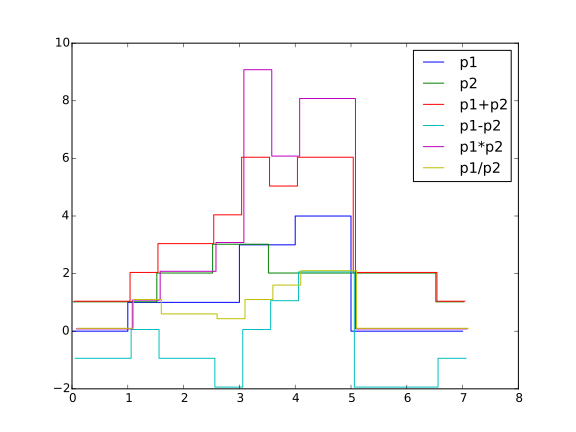

In [66]:
plot.plot([p1,p2,p1+p2,p1-p2,p1*p2,p1/p2],
     labels=['p1','p2','p1+p2','p1-p2','p1*p2','p1/p2'],
     xmax=7, ylim=(-2,10), offset=0.02)

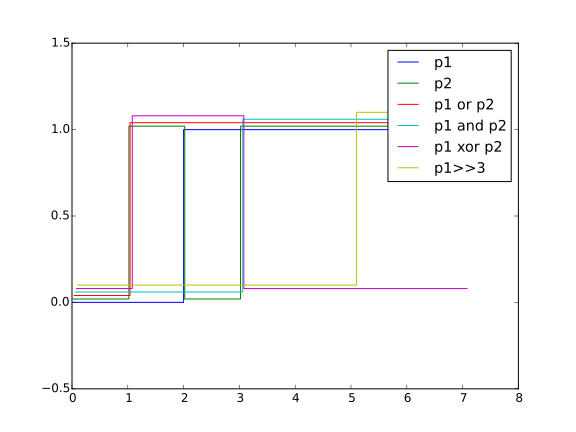

In [67]:
p1=Piecewise([(2,True)],False)
p2=Piecewise([(1,True),(2,False),(3,True)],False)
plot.plot([p1,p2,p1|p2,p1&p2,p1^p2,p1>>3],
     labels=['p1','p2','p1 or p2','p1 and p2','p1 xor p2','p1>>3'],
     xmax=7,ylim=(-.5,1.5), offset=0.02)